# Plasticity of cancer cell invasion - Project status 

Experimental observations:
1. WT cells are **slow and correlated**
2. KD cells are **fast and uncorrelated**
3. Confinement by ECM reduces speed in both cases
4. WT cells are **more correlated** under confinement

Problem: In current model, cells are **always uncorrelated**, cell-cell adhesion only prevents cell detachment from cluster.

In [22]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

<IPython.core.display.Javascript object>


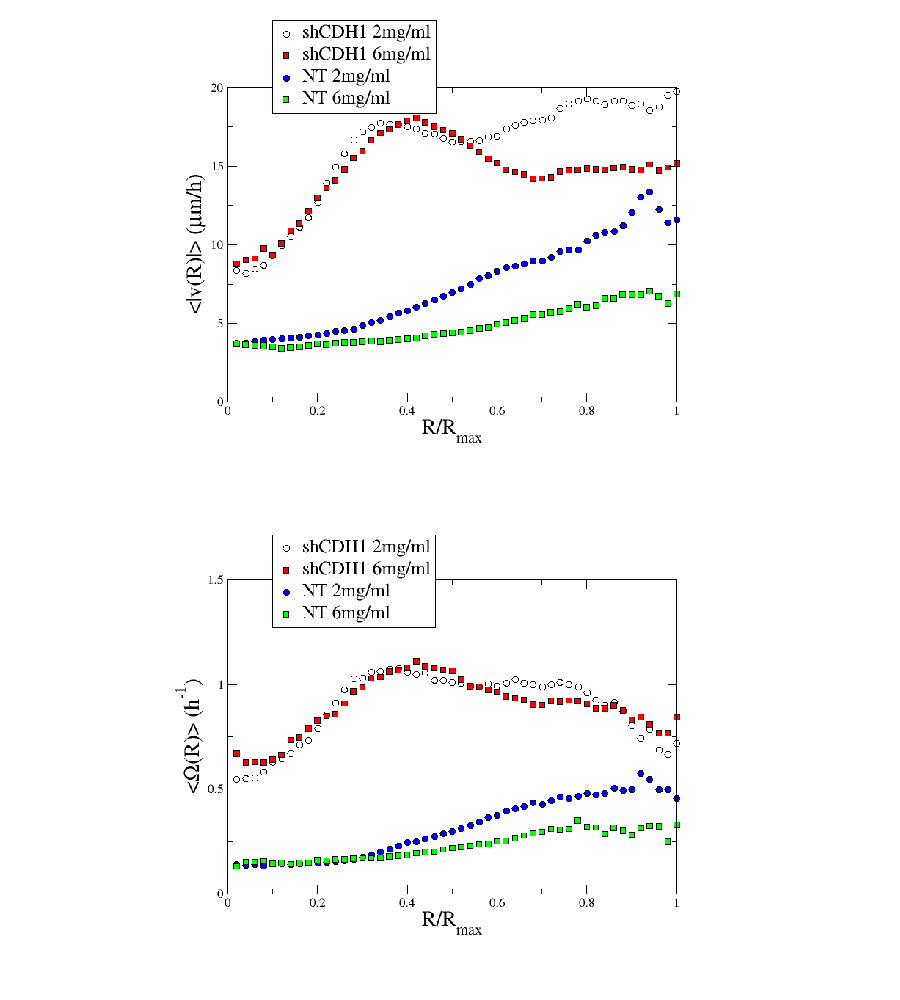

In [17]:
vprofile = mpimg.imread('Velocity-profile-tot-norm.png')
vortprofile = mpimg.imread('Vort-profile_tot-normalized.png')

plt.figure(figsize=(9, 10), tight_layout=True, frameon=False)
plt.subplot(211)
plt.axis('off')
i1 = plt.imshow(vprofile)
plt.subplot(212)
plt.axis('off')
i2 = plt.imshow(vortprofile)

In [11]:
path = '/mnt/data/simon/friedl_paper_raw_data/friedl_project/final/'
ecm_densities = np.load(path + 'densities.npy')
betas = np.load(path + 'betas.npy')
vorticity = np.load(path + 'mean_vorticity.npy')
corrected_vorticity = np.load(path + 'corrected_vorticity.npy')
mov_frac = np.load(path + 'mov_frac.npy')
speed = np.load(path + 'mean_speed.npy')
speed_uni = np.load(path + 'mean_speed_const_window.npy')
speed_gauss = np.load(path + 'mean_speed_gauss_window.npy')
correlations = np.load(path + 'mean_corr.npy')


In [16]:
X, Y = np.meshgrid(ecm_densities, betas, indexing='ij')

<IPython.core.display.Javascript object>


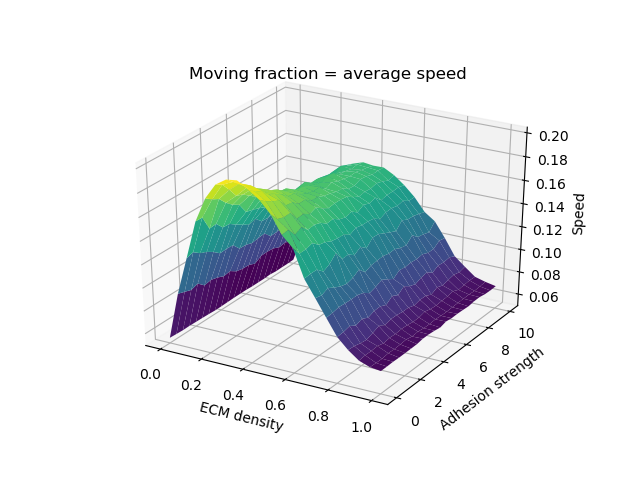

Text(0.5, 0, 'Speed')

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, mov_frac, cmap='viridis')
plt.title('Moving fraction = average speed')
plt.xlabel('ECM density')
plt.ylabel('Adhesion strength')
ax.set_zlabel('Speed')

Speed behaves already correctly in the model and is proportional to the diffusion constant (not shown, see manuscript). However, average speed can be defined in different ways:
1. Above, I show the average fraction of cells in velocity channels. As every cell in a velocity channels performs a jump with speed 1, this fraction is proportional to the "microscopic" speed.
- Similarly, it is possible to use the LGCA definition of the flux $$\vec{J} = \sum_i \vec{c_i} \eta_i.$$ From $\vec{J} = \rho \vec{v}$  and $\rho = \sum_i \eta_i$, we can also define a speed $$\vec{v} = \frac{\vec{J}}{\rho}$$ for $\rho > 0$ (otherwise $\vec{v} = 0$ by definition).
The second definition gives a qualitatively similar result, but the influence of strong adhesion on the speed is more pronounced, see below.

<IPython.core.display.Javascript object>


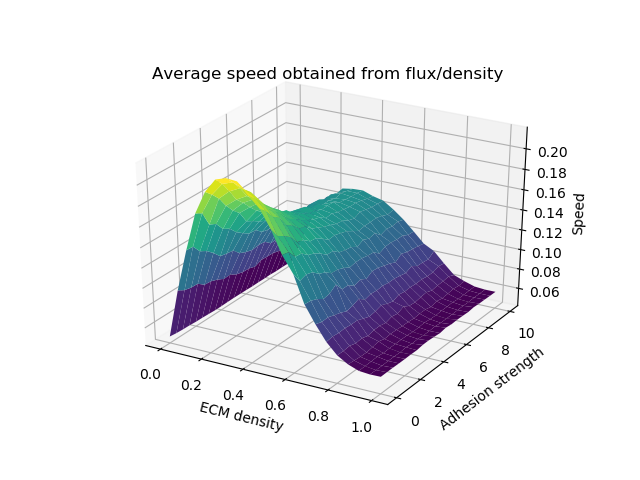

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, speed, cmap='viridis')
plt.title('Average speed obtained from flux/density')
plt.xlabel('ECM density')
plt.ylabel('Adhesion strength')
ax.set_zlabel('Speed')
plt.show()

One idea to identify correlations in the system was to look at time-averaged quantities, especially speeds. To obtain the time average we can use different rolling windows. In particular I tested a uniform window of length 5 and a Gaussian window of variance 5. Basis for time averaging was the the speed obtained from the flux (definition 2). However, as I only want to "measure" the speed at nodes with non-zero density, it becomes quite difficult to define a proper averaging scheme.

<IPython.core.display.Javascript object>


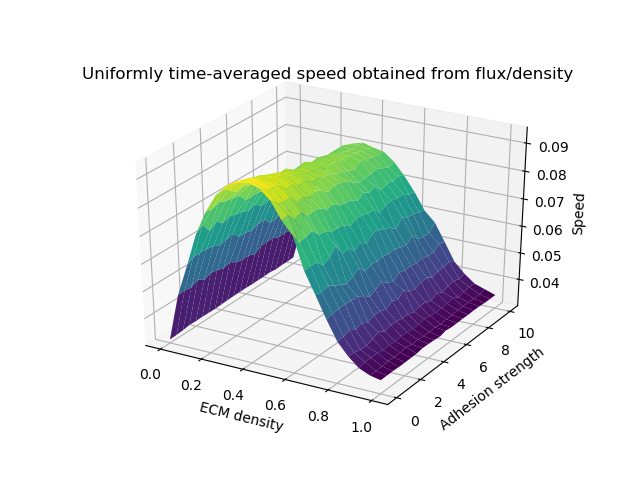

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, speed_uni, cmap='viridis')
plt.title('Uniformly time-averaged speed obtained from flux/density')
plt.xlabel('ECM density')
plt.ylabel('Adhesion strength')
ax.set_zlabel('Speed')
plt.show()

<IPython.core.display.Javascript object>


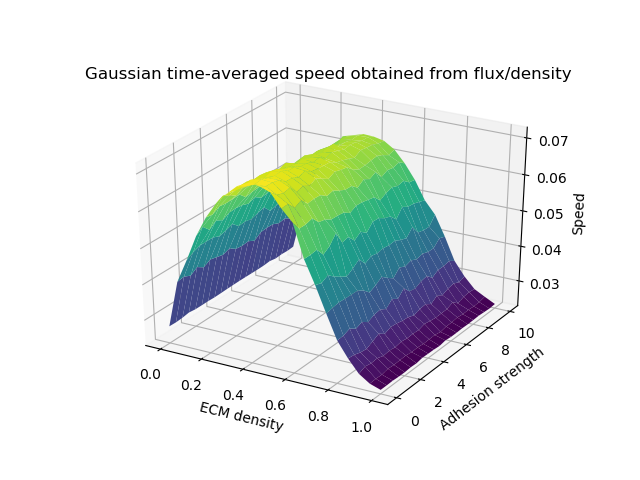

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, speed_gauss, cmap='viridis')
plt.title('Gaussian time-averaged speed obtained from flux/density')
plt.xlabel('ECM density')
plt.ylabel('Adhesion strength')
ax.set_zlabel('Speed')
plt.show()

## Neighbor correlations
We define velocity correlation $c_v$ as 
$$ c_v (r) = \frac{\vec{v}(r) \cdot \sum_i  \vec{v} (r + c_i) }{|v(r)| |\sum_i  \vec{v} (r + c_i)|} $$.

<IPython.core.display.Javascript object>


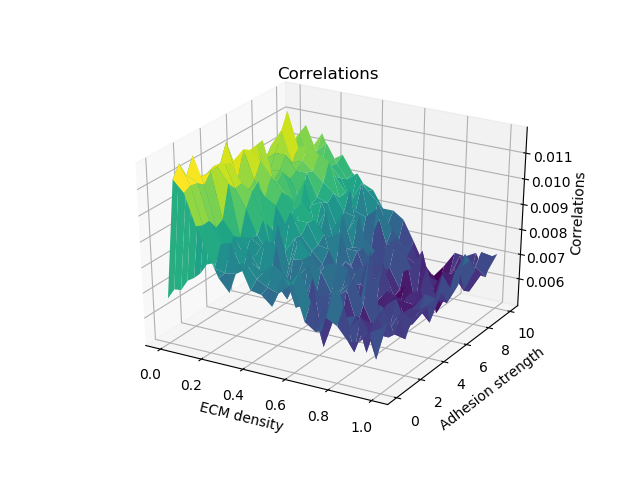

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, correlations, cmap='viridis')
plt.title('Correlations')
plt.xlabel('ECM density')
plt.ylabel('Adhesion strength')
ax.set_zlabel('Correlations')
plt.show()

## Vorticity
The vorticity of a continuous flow field is defined as $$\vec{\Omega} = \vec{\nabla} \times \vec{v}.$$ For a two-dimensional flow field it only has a $z$-component, that is given by 
$$\Omega_z = \partial_x v_y - \partial_y v_x.$$
The partial derivatives can be approximated on the lattice as
$$\partial_i v_j (\vec{r}) \propto \left( \sum_k \vec{c}_k v_j (\vec{r} + \vec{c}_k) \right)_i = \sum_k c_{k,i} v_j (\vec{r} + \vec{c}_k).$$
For the vorticity we end up with
$$\Omega \propto \sum_i c_{i,x} v_y(\vec{r}+\vec{c_i}) - c_{i,y} v_x(\vec{r} + \vec{c_i})$$

<IPython.core.display.Javascript object>


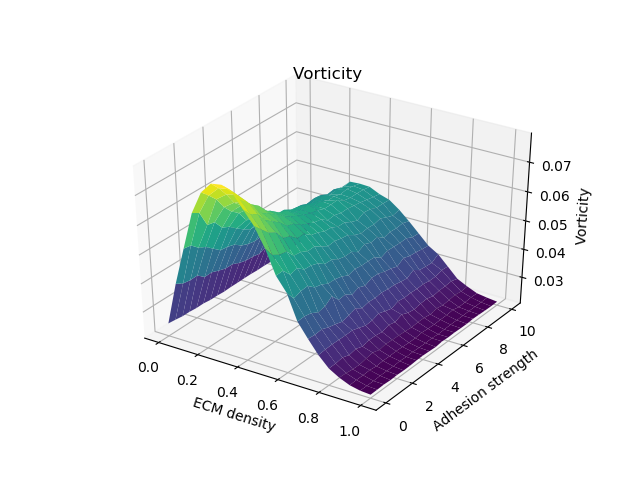

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, vorticity, cmap='viridis')
plt.title('Vorticity')
plt.xlabel('ECM density')
plt.ylabel('Adhesion strength')
ax.set_zlabel('Vorticity')
plt.show()

Problem: Vorticity proportional to velocity. If we normalize the flow field, to only say anything about correlations, we obtain the following plot -> similar to correlation plot, as expected. 

<IPython.core.display.Javascript object>


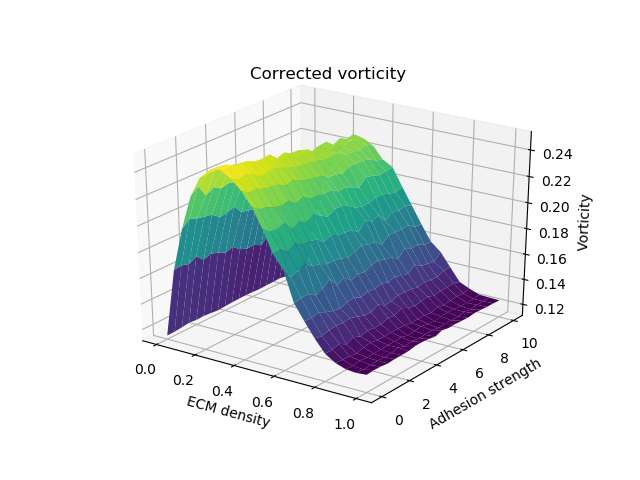

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, corrected_vorticity, cmap='viridis')
plt.title('Corrected vorticity')
plt.xlabel('ECM density')
plt.ylabel('Adhesion strength')
ax.set_zlabel('Vorticity')
plt.show()

# Discussion
**Problem: Vorticity and correlations do not depend on adhesion strength!**
This is not surprising, because there is no alignment mechanism in the model. Consequently, single cells as well as cells in the bulk perform a random walk (with different diffusion constants). However, simply adding alignment extremely increases the speed for high sensitivity values $\to$ we need to combine alignment with adhesion in a reasonable way.
Problem:
- We then have 2 parameters (alignment and adhesion sensitivity), that both describe an effect of adhesion, but in the experiment there is only 1 parameter.
- We can make one parameter depend on the other (or make them equal), but this is a rather arbitrary choice and the dynamics is very sensitive to it.

I tried to design such an interaction anyway, see simulations below. The transition probability reads
$$ P(\eta\to \eta\prime) = \frac{1}{Z} \exp \left\{ \beta  \left( \frac{1}{2b} \vec{J}\cdot \vec{J}^\mathcal{N} + \frac{2}{b\rho_0} n_r^\mathcal{N} n_r \left(1 - \frac{n_r}{2\rho_0}\right) \right) + \frac{\beta}{n_0} \sum_{i=0}^{b-1} \eta_i \Delta n_i^\mathcal{N} \left( 1 - \frac{n_i^\mathcal{N}}{2n_0} \right)\right\},$$ 
where $\rho_0 := \frac{n_0 + 1}{b+1}$ is the critical node density defined with the critical number of neighbors for adhesion $n_0$.

# Steady state from homogeneous initial state

In [21]:
from lgca import get_lgca
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook


In [22]:
l = 50
restc = 6
nodes = np.zeros((l, l, restc+6))
nodes[..., :6, -3:] = 1
dens = 1. / (restc + 6)
ecmdens = 0.1
#nodes[10, 10, 1] = 1
lgca = get_lgca(geometry='hex', interaction='wetting', beta=10., alpha=0, gamma=10, bc='rbc', density=0, restchannels=restc, nodes=nodes)
lgca.r_b = .01
lgca.spheroid = np.zeros_like(lgca.cell_density, dtype=bool)
lgca.spheroid[lgca.r_int:-lgca.r_int, :lgca.r_int+6] = 1
lgca.ecm = (np.random.random(lgca.cell_density.shape) < ecmdens) & np.invert(lgca.spheroid)

#lgca.timestep()

<IPython.core.display.Javascript object>


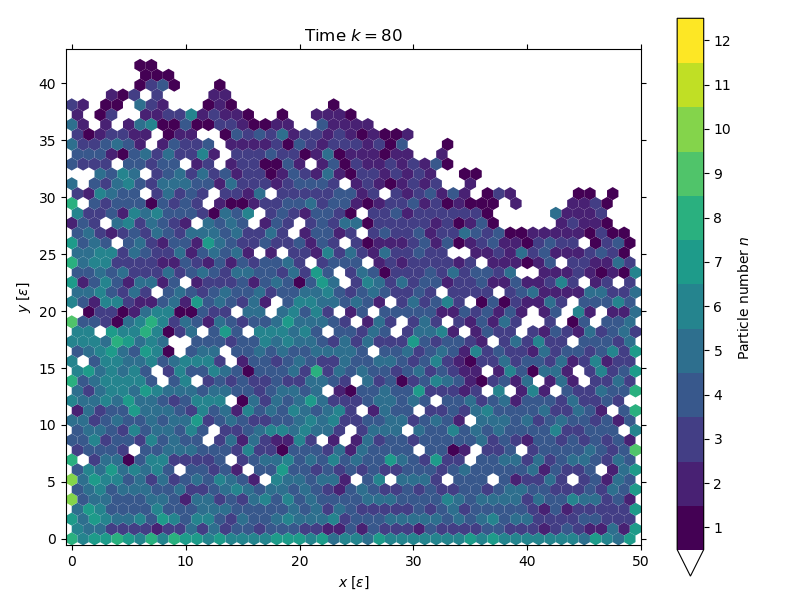

In [25]:
#ani = lgca.animate_flux()
#ani.save('Ecad_lo.avi')
#lgca.plot_density(lgca.ecm[lgca.nonborder], cmap='Greys', vmax=1, figindex=0, cbar=False)
#lgca.plot_density()
#lgca.live_animate_flux(figindex=0)
lgca.live_animate_density(figindex=0)

#lgca.live_animate_density()
#lgca.live_animate_config()
#lgca.timeevo(2, showprogress=False)
#print(lgca.nodes[lgca.r_int:-lgca.r_int, lgca.r_int].sum(-1).mean())

In [16]:
print(lgca.nodes.sum())

3363


<IPython.core.display.Javascript object>


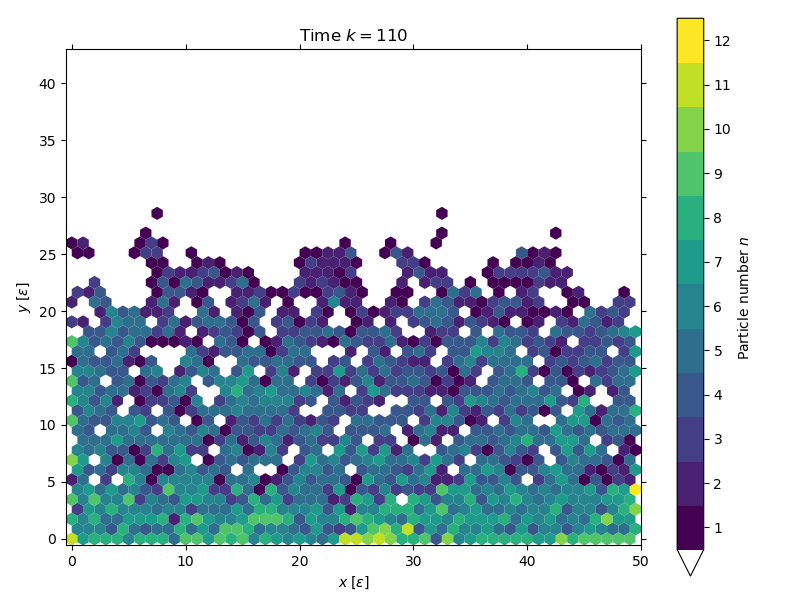

In [17]:
lgca.live_animate_density()

In [7]:
print(lgca.nodes.sum())

2743


# "Wound healing" simulation
## WT cells

In [21]:
l = 50
restc = 6
mean_dens = 0.5 / (restc + 6)
nodes = np.zeros((l, l, restc+6))
nodes[..., :6, -3:] = 1
lgca = get_lgca(interaction='wetting', beta=0, alpha=0, gamma=2, bc='refl', density=0, restchannels=restc, nodes=nodes)
lgca.n_crit = 20
lgca.r_b = 1
lgca.spheroid = np.zeros_like(lgca.cell_density, dtype=bool)
lgca.spheroid[lgca.r_int:-lgca.r_int, 0:lgca.r_int+6] = 1

<IPython.core.display.Javascript object>


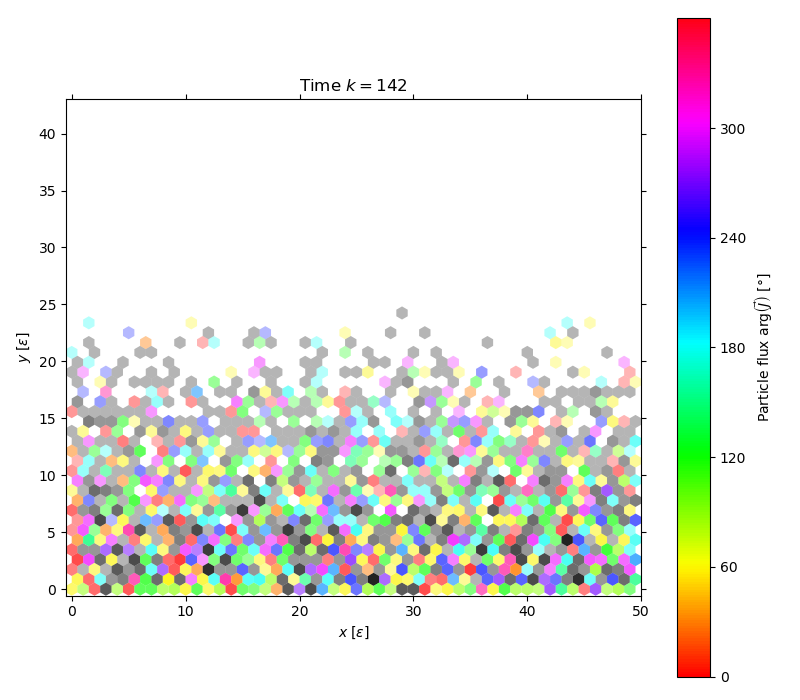

In [22]:
#lgca.timeevo(150, record=True)
#lgca.timestep()
lgca.live_animate_flux()
#lgca.live_animate_density()
#lgca.plot_density()

<IPython.core.display.Javascript object>


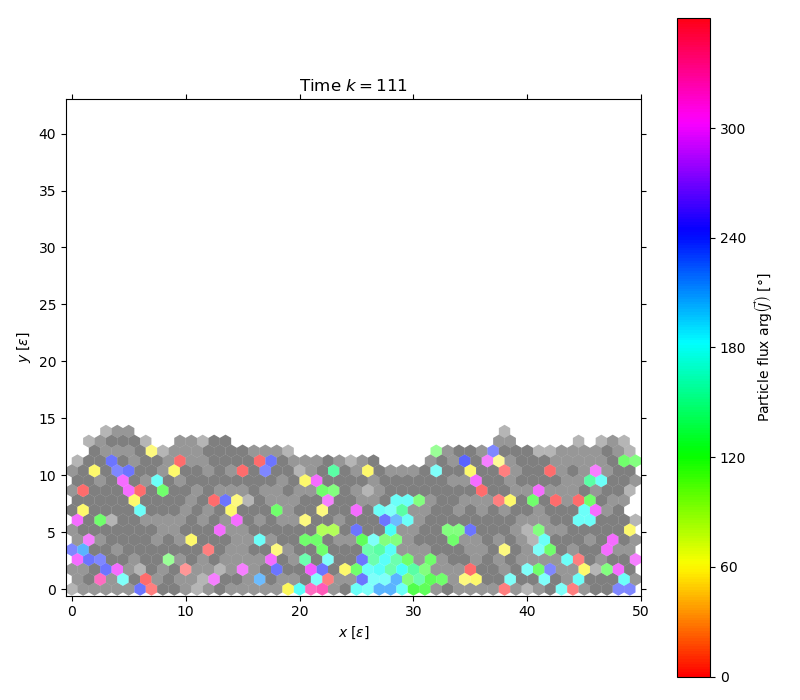

In [14]:
ani = lgca.live_animate_flux()

In [25]:
#ani.save('WT_cells.mp4')

In [8]:
print(lgca.nodes.sum()/ lgca.lx / lgca.ly / lgca.K) 
print(3 / lgca.K)

0.2494333333333333
0.25


In [54]:
record = np.moveaxis(lgca.nodes_t, 0, 2)
dens = record.sum(-1)
flux = lgca.calc_flux(record)
v = np.divide(flux, dens[..., None], where=dens[..., None]>0, out=np.zeros_like(flux))
speed = np.linalg.norm(v, axis=-1)
mean_v = np.mean(speed[dens>0])
#v = flux
nb_v = lgca.nb_sum(v)
nb_v_norm = np.linalg.norm(nb_v, axis=-1)

corr = np.einsum('...i, ...i', v, nb_v)
corr = np.divide(corr, speed, where=speed>0, out=np.zeros_like(corr))
corr = np.divide(corr, nb_v_norm, where=nb_v_norm>0, out=np.zeros_like(corr))
corr = np.mean(corr[speed>0])
mean_speed = lgca.nodes_t[..., :lgca.velocitychannels].sum() / lgca.nodes_t.sum()

In [55]:
print('Correlations =', corr)
print('Mean moving fraction =', mean_speed)
print('Speed =', mean_v)

Correlations = 0.449953630125648
Mean moving fraction = 0.16896864686468646
Speed = 0.1202358880328735


## KD cells (no adhesion)

In [56]:
lgca = get_lgca(interaction='wetting', beta=0, alpha=5, gamma=0, bc='pbc', density=mean_dens, restchannels=restc, nodes=nodes)
lgca.n_crit = 20

In [57]:
lgca.timeevo(record=True)

Progress: [####################] 100% Done...


In [58]:
record = np.moveaxis(lgca.nodes_t, 0, 2)
dens = record.sum(-1)
flux = lgca.calc_flux(record)
v = np.divide(flux, dens[..., None], where=dens[..., None]>0, out=np.zeros_like(flux))
speed = np.linalg.norm(v, axis=-1)
mean_v = np.mean(speed[dens>0])
#v = flux
nb_v = lgca.nb_sum(v)
nb_v_norm = np.linalg.norm(nb_v, axis=-1)

corr = np.einsum('...i, ...i', v, nb_v)
corr = np.divide(corr, speed, where=speed>0, out=np.zeros_like(corr))
corr = np.divide(corr, nb_v_norm, where=nb_v_norm>0, out=np.zeros_like(corr))
corr = np.mean(corr[speed>0])
mean_speed = lgca.nodes_t[..., :lgca.velocitychannels].sum() / lgca.nodes_t.sum()

In [59]:
print('Correlations =', corr)
print('Mean moving fraction =', mean_speed)
print('Speed =', mean_v)

Correlations = 0.16019965133719444
Mean moving fraction = 0.4870860836083608
Speed = 0.23674185312892038


# Invasion assay w/o ECM

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from lgca import get_lgca
%matplotlib notebook

betas = np.linspace(0, 10, 21)
N = 10
dims = (50, 50)
tmax = 100
restc = 6
nodes = np.zeros((l, l, restc+6))
nodes[..., :5, -3:] = 1
nodes_bnt = np.empty((len(betas), N, tmax, dims[0], dims[1], 6+restc), dtype=bool)
lgca = get_lgca(geometry='hex', interaction='wetting', beta=10., alpha=0, gamma=1, bc='rbc', density=dens, restchannels=restc, nodes=nodes)
lgca.r_b = .01
lgca.spheroid = np.zeros_like(lgca.cell_density, dtype=bool)
lgca.spheroid[lgca.r_int:-lgca.r_int, :lgca.r_int+5] = 1

In [11]:
i = 0
for beta in betas:
    lgca.beta = beta
    for j in range(N):
        lgca.init_nodes(nodes=nodes)
        #lgca.timeevo(tmax//2, recorddens=False, showprogress=False)
        lgca.timeevo(tmax-1, recorddens=False, record=True, showprogress=False)
        nodes_bnt[i, j] = lgca.nodes_t
        
    i += 1 

In [12]:
np.save('nodes_bnt.npy', nodes_bnt)

In [27]:
nodes_bnt = np.load('nodes_bnt.npy')

record = np.moveaxis(nodes_bnt, 0, -2)
record = np.moveaxis(record, 0, -2)
record = np.moveaxis(record, 0, -2)
dens = record.sum(-1)
vorts = np.empty(len(betas))
corrs = np.empty(len(betas))
speeds = corrs.copy()


flux = lgca.calc_flux(record)
v = np.divide(flux, dens[..., None], where=dens[..., None]>0, out=np.zeros_like(flux))
speed = np.linalg.norm(v, axis=-1)

vort = abs(lgca.calc_vorticity(record))



#mean_v = np.mean(speed[dens>0])
#v = flux
nb_v = lgca.nb_sum(v)
nb_v_norm = np.linalg.norm(nb_v, axis=-1)

corr = np.einsum('...i, ...i', v, nb_v)
corr = np.divide(corr, speed, where=speed>0, out=np.zeros_like(corr))
corr = np.divide(corr, nb_v_norm, where=nb_v_norm>0, out=np.zeros_like(corr))

#corr = np.mean(corr[dens>0])


for i in range(len(betas)):
    vorti = vort[:, :, i]
    densi = dens[:, :, i]
    corri = corr[:, :, i]
    densi = dens[:, :, i]
    speedi = speed[:, :, i]
    speeds[i] = np.mean(speedi[densi>0])
    vorts[i] = np.mean(vorti[densi>0])
    corrs[i] = np.mean(corri[speedi>0])
    

mean_speed = np.sum(record[..., :lgca.velocitychannels], axis=(0, 1, 3, 4, 5)) / np.sum(record, axis=(0, 1, 3, 4, 5))

<IPython.core.display.Javascript object>


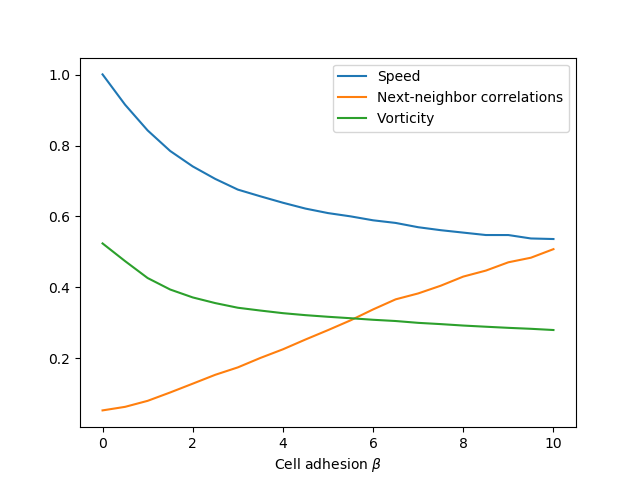

In [30]:
plt.plot(betas, mean_speed * 2, label='Speed')
#plt.plot(betas, speeds * 2, label='Speed (Def. 2)')
plt.plot(betas, corrs, label='Next-neighbor correlations')
plt.plot(betas, vorts, label='Vorticity')
plt.xlabel('Cell adhesion $\\beta$')
plt.legend()
#plt.savefig('wound_healing_analysis.png')

# Varying ECM density and cell-cell adhesion

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lgca import get_lgca
%matplotlib notebook

betas = np.linspace(0, 10, 21)
ecms = np.linspace(0, 1, 21)
N = 10
l = 50
ecmdens = 0
dims = (l, l)
tmax = 100
restc = 6
nodes = np.zeros((l, l, restc+6))
nodes[..., :5, -3:] = 1
nodes_bent = np.empty((len(betas), len(ecms), N, tmax, dims[0], dims[1], 6+restc), dtype=bool)
lgca = get_lgca(geometry='hex', interaction='wetting', beta=10., alpha=0, gamma=10, bc='rbc', density=0, restchannels=restc, nodes=nodes)
lgca.r_b = .01
lgca.spheroid = np.zeros_like(lgca.cell_density, dtype=bool)
lgca.spheroid[lgca.r_int:-lgca.r_int, :lgca.r_int+5] = 1
lgca.ecm = (np.random.random(lgca.spheroid.shape) < ecmdens) & np.invert(lgca.spheroid)


In [2]:
i = 0
for beta in betas:
    lgca.beta = beta
    j = 0
    for ecmdens in ecms:
        for k in range(N):
            lgca.init_nodes(nodes=nodes)
            lgca.ecm = (np.random.random(lgca.spheroid.shape) < ecmdens) & np.invert(lgca.spheroid)
            #lgca.timeevo(tmax//2, recorddens=False, showprogress=False)
            lgca.timeevo(tmax-1, recorddens=False, record=True, showprogress=False)
            nodes_bent[i, j, k] = lgca.nodes_t
        
        j += 1
        
    i += 1 

In [ ]:
np.save('nodes_bent.npy', nodes_bent)